<a href="https://colab.research.google.com/github/Felipanjos/a3_ia_2022.2/blob/main/Projeto_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
# https://www.kaggle.com/datasets/michaelbryantds/cpu-and-gpu-product-data

### Análise e Entendimento do Problema:

#### Especificação do objetivo geral e dos objetivos específicos

O Objetivo geral do projeto é identificar a relação entre a quantidade dos transistors presentes nos processadores e qual a influência que o tamanho, TDP, entre outras características tem sob o processamento. Dentre os objetivos específicos está o tratamento das informações removendo os outliers, padronizando os dados, analisando as alterações, entre outros.

### a. Especificação do tipo de problema: Quanto à Supervisão, Quanto à Tarefa, Quanto ao Modo;

À FAZER 


b. Especificação das Medidas de Desempenho (para Classificação ou Regressão)


Como metódos de desempenho, os principais utilizados no nosso projeto, se tratam de acurácia para a Classicação e erro quadrático médio para Regressão, esses metódos, são extremamente importantes, pois é através deles que é possível observar o quão precisas estão sendo as predições realizadas pela máquina, por serem duas formas diferentes de Aprendizado de máquina supervisionado, cada um possui seu próprio método de desempenho, para a classificação usaremos o principal citado anteriormente, acurácia, se trata de um indicador da performance geral do modelo, contando quantas classificações foram feitas corretamente, para ser calculado, se torna necessário utilizar a Matriz de confusão, identificando os verdadeiros positivos, falso negativos, falso positivos e verdadeiros negativos, através desses dados é possível montar a Matriz e utilizar a formúla VP+VN/VP+VN+FP+FN para assim medir a acurácia do modelo, já para a regressão utilizaremos o erro quadrático médio, esse método carrega como objetivo encontrar a diferença dos valores iniciais com os valores preditos, quanto mais alta a diferença, maior o problema do modelo, pois os valores encontrados não estão sendo precisos, essa média é calculada através da diferença do valor predito para o valor real, o resultado é elevado ao quadrado, fazendo isso para todos os pontos, como já dito, quanto maior o resultado, mais pobre estão sendo as predições.

##### Hipótese

Com o avanço tecnológico e embasados na lei de Moore, observa-se um crescimento exponencial de transistores em unidades de processamento (CPU's & GPU's) em função do tempo. De forma inversamente proporcional, é perceptível a redução do tamanho dos componentes. Neste projeto, utilizando 2 modelos de aprendizado de máquina, regressão linear e KNN (K-ésimo Vizinho mais Próximo), buscamos prever a quantidade de transistores de uma UDP tendo como parâmetros a TDP (Thermal design power) e seu Die Size. 

# 2.3 Requisitos da Análise de Dados:

#### Dependências

In [137]:
import pandas as pd
import numpy as np
import random
import string
import sklearn
from itertools import groupby
import plotly.express as px
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

### Carregando Dataset

In [68]:
df = pd.read_csv('chip_dataset.csv', index_col=0)

### Excluindo colunas sem utilidade

########### Explicação

In [69]:
df.drop('FP16 GFLOPS', axis=1, inplace=True)
df.drop('FP32 GFLOPS', axis=1, inplace=True)
df.drop('FP64 GFLOPS', axis=1, inplace=True)

## Inserindo problemas

##### Selecionando coluna aleatória

In [70]:
# escolhendo uma coluna aleatoriamente
random.seed(13)
n = random.randrange(0,len(df.columns))
coluna_aleatoria = df.columns[n]
coluna_aleatoria

'TDP (W)'

In [71]:
df.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD


##### a) Selecionando 3% dos dados

In [72]:
p_3 = round(df.shape[0] * 3 / 100)
p_3

146

##### a) Excluindo 3% dos dados aleatoriamente

In [73]:
reg_excluidos = df.sample(n=p_3)
reg_exc_index = reg_excluidos.index.array
df.loc[reg_exc_index, coluna_aleatoria] = np.nan

In [74]:
# listando alterações
df.loc[reg_exc_index]

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
632,Intel Core i3-4330T,CPU,2013-09-01,22.0,NaN,177.0,1400.0,3000.0,Intel,Intel
3474,AMD Radeon RX 580,GPU,2017-04-18,14.0,NaN,232.0,5700.0,1257.0,GF,AMD
3469,AMD Radeon R5 Graphics,GPU,2017-09-05,28.0,NaN,125.0,1200.0,200.0,GF,AMD
3248,NVIDIA GeForce GTX 980M,GPU,2014-10-07,28.0,NaN,398.0,5200.0,1038.0,TSMC,NVIDIA
198,Intel Pentium G3450,CPU,2014-05-01,22.0,NaN,177.0,1400.0,3300.0,Intel,Intel
...,...,...,...,...,...,...,...,...,...,...
4743,NVIDIA GeForce2 MX 400,GPU,2001-03-03,180.0,NaN,64.0,20.0,200.0,TSMC,NVIDIA
3561,NVIDIA GeForce GTX 550 Ti,GPU,2011-03-15,40.0,NaN,238.0,1170.0,900.0,TSMC,NVIDIA
1699,Intel Pentium 4 519,CPU,2004-12-01,90.0,NaN,109.0,125.0,3060.0,Intel,Intel
4079,NVIDIA GeForce4 Ti 4200,GPU,2002-02-06,150.0,NaN,142.0,63.0,250.0,TSMC,NVIDIA


##### a) Alterando 3% dos dados aleatoriamente

In [75]:
def gerar_string_aleatoria():
  letters = string.ascii_lowercase
  return ''.join(random.choice(letters) for i in range(10)) 

def gerar_numero_aleatorio():
  return random.randint(0, 999)

In [76]:
# listando indexes que sofrerão alteração na coluna aleatória
df_selecao_nao_nulo = df[~df[coluna_aleatoria].isnull()]
reg_alterados = df_selecao_nao_nulo.sample(n=p_3)
reg_alter_index = reg_alterados.index.array

In [77]:
# inserindo alterações na coluna aleatória
colunas_numericas = df.describe().columns

if coluna_aleatoria in colunas_numericas:
    for index in reg_alter_index:
        df.loc[[index],[coluna_aleatoria]] = gerar_numero_aleatorio()
else:
    for index in reg_alter_index:
        df.loc[[index],[coluna_aleatoria]] = gerar_string_aleatoria()

In [78]:
# listando alterações
df.loc[reg_alter_index]

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
620,Intel Atom E640,CPU,2010-09-14,45.0,297.0,26.0,47.0,1000.0,Intel,Intel
1158,AMD Ryzen 3 3200G,CPU,2019-07-07,12.0,701.0,210.0,49.0,3600.0,GF,AMD
4372,NVIDIA GeForce MX230,GPU,2019-02-21,14.0,931.0,74.0,1800.0,1519.0,Samsung,NVIDIA
2156,Intel Pentium M 750,CPU,2005-01-19,90.0,700.0,84.0,140.0,1860.0,Intel,Intel
614,Intel Core i5-4690,CPU,2014-05-01,22.0,821.0,177.0,1400.0,3400.0,Intel,Intel
...,...,...,...,...,...,...,...,...,...,...
1685,AMD Athlon 64 X2 5400+ BE,CPU,2008-02-01,65.0,359.0,126.0,154.0,2800.0,Unknown,AMD
322,Intel Core i5-10300H,CPU,2020-09-17,14.0,207.0,NaN,NaN,2500.0,Intel,Intel
4125,NVIDIA GeForce GT 645M,GPU,2012-10-01,28.0,722.0,118.0,1270.0,709.0,TSMC,NVIDIA
2766,NVIDIA GeForce G100 OEM,GPU,2009-03-10,65.0,874.0,86.0,210.0,540.0,TSMC,NVIDIA


#### Tratamento de registros nulos em colunas descritivas. Estratégia adotada: exclusão.

In [79]:
# Exlusão dos registros nulos nas colunas categoricas
colunas_descritivas = [x for x in list(df.columns) if x not in list(df.describe().columns)]
for col in colunas_descritivas:
    df = df[pd.notnull(df[col])]

#### Tratamento de registros duplicados. Estratégia: exclusão.

In [80]:
df.duplicated().sum()

115

In [81]:
df.drop_duplicates(inplace=True)

#### Tratamento de registros nulos em colunas numéricas. Estratégia adotada: inserção da média.

In [82]:
df.isnull().sum()

Product                    0
Type                       0
Release Date               0
Process Size (nm)          9
TDP (W)                  728
Die Size (mm^2)          683
Transistors (million)    689
Freq (MHz)                 0
Foundry                    0
Vendor                     0
dtype: int64

In [83]:
def imputer_mean(coluna):
    df[coluna] = df[coluna].fillna(df[coluna].mean())
    
for col in list(df.describe().columns):
    imputer_mean(col)

#### Divisão (Amostragem Estratificada)

In [84]:
# A amostragem estratificada classifca a quantidade de transistors em ranks, sendo assim possível realizar a contagem da quantidade de processadores que possuem um range da quantidade 
# de transistors

# < 250:                Rank F
# >= 250 & < 500:       Rank E
# >= 500 & < 1000:      Rank D
# >= 1000 & < 2000:     Rank C
# >= 2000 & < 6000:     Rank B
# >= 6000 & < 15000:    Rank A
# >= 15000 & < 30000:   Rank S 
# > 30000:              Rank S+ 

In [85]:
df.reset_index(drop=True, inplace=True)

In [86]:
def amostragem_estratificada(test_set):
    return (test_set['Rank'].value_counts() / len(test_set))*100

In [87]:
ranges = [0, 250, 500, 1000, 2000, 6000, 15000, 30000, np.inf]
tiers = ['F', 'E', 'D', 'C', 'B', 'A', 'S', 'S+']

df['Rank'] = pd.cut(df['Transistors (million)'], bins = ranges, labels = tiers)

In [88]:
df['Rank'].value_counts()

C     1407
F     1361
B      611
D      565
E      481
A      246
S       60
S+       8
Name: Rank, dtype: int64

In [89]:
# Com base no gráfico é possível concluir que, nesta base de dados, os processadores com menos de 250 transistores são maioria, seguidos pelos de 1000 a 2000.

<AxesSubplot: xlabel='Rank', ylabel='count'>

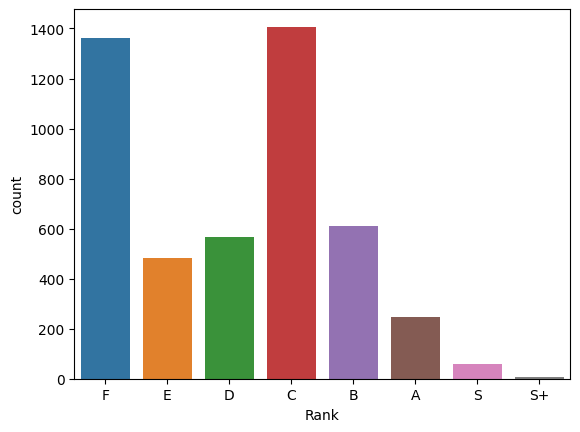

In [90]:
sns.countplot(x='Rank', data=df, order=tiers)

## Exploração 

##### Busca de correlações (Coeficientes de correlação)

In [91]:
# A correlação de Pearson é utilizada para identificar as colunas que possuem maior relação com a coluna em análise, neste caso 'Transistors (million)'.

In [92]:
colunas_para_calculo = df.describe().columns
print('Coeficiente de correlação de Pearson entre a coluna Die Size (mm^2) e:')

coor_dict = {}
r_list = []

for value in df.corr()['Die Size (mm^2)']:
    if value == 1:
        r = 'relação linear perfeita e positiva'
    elif value == 0:
        r = 'inexistência linear'
    elif value == -1:
        r = 'relação linear perfeita e negativa'
    elif value > 0:
        r = 'relação linear positiva'
    elif value < 0:
        r = 'relação linear negativa'

    r_list.append(r)

print(df.corr(method='pearson', min_periods=1)['Transistors (million)'], '\n')

count = 0
for col in colunas_para_calculo: 
    coor_dict[col] = r_list[count]
    print(f'{col}: {coor_dict[col]}')
    count += 1

Coeficiente de correlação de Pearson entre a coluna Die Size (mm^2) e:
Process Size (nm)       -0.383891
TDP (W)                  0.268781
Die Size (mm^2)          0.628382
Transistors (million)    1.000000
Freq (MHz)               0.015706
Name: Transistors (million), dtype: float64 

Process Size (nm): relação linear negativa
TDP (W): relação linear positiva
Die Size (mm^2): relação linear perfeita e positiva
Transistors (million): relação linear positiva
Freq (MHz): relação linear positiva


C:\Users\amr\AppData\Local\Temp\ipykernel_22396\939001549.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  for value in df.corr()['Die Size (mm^2)']:
C:\Users\amr\AppData\Local\Temp\ipykernel_22396\939001549.py:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr(method='pearson', min_periods=1)['Transistors (million)'], '\n')


## Análise dos Dados

In [93]:
df_an = df.copy()
df_an.set_index('Release Date', inplace=True)
df_an.sort_index(inplace=True)

In [94]:
df_cpu = df_an[df_an["Type"] == "CPU"]
df_gpu = df_an[df_an["Type"] == "GPU"]

### Analise da quantidade dos Transistors vs Tamanho do Núcleo por Anos

#### CPU

In [95]:
fig_transistors = make_subplots()
fig_die = make_subplots()

# Add traces
fig_transistors.add_trace(
    go.Scatter(x= df_an.index, y=df_cpu["Transistors (million)"] ,name= "CPU")
)
# Add figure title
fig_transistors.update_layout(
    title_text="CPU vs Transistors (million) evolution over years"
)
# Set x-axis title
fig_transistors.update_xaxes(title_text="Years")
# Set y-axes titles
fig_transistors.update_yaxes(title_text="<b>Transistors (million)", secondary_y=False)

# Add traces
fig_die.add_trace(
    go.Scatter(x= df_an.index, y=df_cpu["Die Size (mm^2)"] ,name= "CPU")
)
# Add figure title
fig_die.update_layout(
    title_text="CPU vs Die Size (mm^2) evolution over years"
)
# Set x-axis title
fig_die.update_xaxes(title_text="Years")
# Set y-axes titles
fig_die.update_yaxes(title_text="<b>Die Size (mm^2)", secondary_y=False)

fig_transistors.show()
fig_die.show()

#### GPU

In [96]:
fig_transistors = make_subplots()
fig_die = make_subplots()

# Add traces
fig_transistors.add_trace(
    go.Scatter(x= df_an.index, y=df_gpu["Transistors (million)"] ,name= "GPU")
)
# Add figure title
fig_transistors.update_layout(
    title_text="GPU vs Transistors (million) evolution over years"
)
# Set x-axis title
fig_transistors.update_xaxes(title_text="Years")
# Set y-axes titles
fig_transistors.update_yaxes(title_text="<b>Transistors (million)", secondary_y=False)

# Add traces
fig_die.add_trace(
    go.Scatter(x= df_an.index, y=df_gpu["Die Size (mm^2)"] ,name= "GPU")
)
# Add figure title
fig_die.update_layout(
    title_text="GPU vs Die Size (mm^2) evolution over years"
)
# Set x-axis title
fig_die.update_xaxes(title_text="Years")
# Set y-axes titles
fig_die.update_yaxes(title_text="<b>Die Size (mm^2)", secondary_y=False)

fig_transistors.show()
fig_die.show()

##### Analise de Transistors x Die Size

### Análise de frquência

In [97]:
fig = make_subplots()

# Add traces
fig.add_trace(
    go.Scatter(x= df_cpu.index, y=df_cpu["Freq (MHz)"] ,name= "CPU")
)

fig.add_trace(
    go.Scatter(x= df_gpu.index,y= df_gpu["Freq (MHz)"], name= "GPU")
)

# Add figure title
fig.update_layout(
    title_text="CPU/GPU vs Frequency (MHz) evolution over years"
)

# Set x-axis title
fig.update_xaxes(title_text="Years")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Freq (MHz)</b>", secondary_y=False)

fig.show()

### Analise Proccess Size

In [98]:
fig = make_subplots()

# Add traces
fig.add_trace(
    go.Scatter(x= df_cpu.index, y=df_cpu["Process Size (nm)"] ,name= "CPU")
)

fig.add_trace(
    go.Scatter(x= df_gpu.index,y= df_gpu["Process Size (nm)"], name= "GPU")
)

# Add figure title
fig.update_layout(
    title_text="CPU/GPU vs Process Size (nm) evolution over years"
)

# Set x-axis title
fig.update_xaxes(title_text="Years")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Process Size (nm)</b>", secondary_y=False)

fig.show()

## Pré-Processamento dos Dados

##### Normalização dos dados

In [138]:
normalizacao_pipeline = Pipeline([
        ('std_scaler', MinMaxScaler())
    ])

##### Full Pipeline

In [139]:
def full_pipe(dataframe):
    full_pipeline = ColumnTransformer([
            ('num_attr', normalizacao_pipeline, dataframe.describe().columns),
        ])
    
    return full_pipeline.fit_transform(dataframe)   

## MODELOS

#### Divisão de conjuntos, treino e teste

In [101]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in splitter.split(df, df['Rank']):
  train = df.loc[train_index]
  test = df.loc[test_index]

In [102]:
train.drop(columns=['Rank'], inplace=True)
test.drop(columns=['Rank'], inplace=True)

In [166]:
train_prepared = full_pipe(train)

In [104]:
test_prepared = full_pipe(test)

### Regressão Linear

In [105]:
x = train[['Transistors (million)']]
y = train[['Die Size (mm^2)']]

lin_reg = LinearRegression().fit(x, y)

In [106]:
c_angular = lin_reg.coef_
c_linear = lin_reg.intercept_

In [ ]:
plt.scatter(x, y)
plt.plot(x, c_linear + c_angular * x, color='red')
plt.show()

In [153]:
cpu_labels = train['Transistors (million)'].copy()
cpu = train.drop(['Transistors (million)', 'Product', 'Type', 'Release Date', 'Foundry', 'Vendor'], axis=1)


In [154]:
cpu_prepared = full_pipe(cpu)

In [160]:
lin_reg = LinearRegression().fit(cpu.values, cpu_labels.values)

In [161]:
cpu_predictions = lin_reg.predict(cpu_prepared)
cpu_predictions

array([147.04730496, 159.02517339, 151.14953018, ..., 143.7538974 ,
       155.444818  , 151.53091352])

#### Erro Médio Quadrático

In [164]:
lin_rmse = mean_squared_error(cpu_labels, cpu_predictions, squared=False)

In [165]:
round(lin_rmse, 2)

4123.28

# 2.4 Requisitos da Construção dos Modelos e Aprendizado de Máquina 

### Seleção dos Modelos